<a href="https://colab.research.google.com/github/driano1221/iik090k9/blob/main/TrabalhoCDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment No. 2 - Data exploration and enrichment for supervised classification
O principal objetivo em termos de programação e ciência de dados é desenvolver um pipeline completo de ciência de dados para abordar um caso de uso real, utilizando o conjunto de dados Hepatocellular Carcinoma (HCC). Mais especificamente, o objetivo é criar um pipeline de aprendizado de máquina capaz de determinar a sobrevivência dos pacientes **1 ano após o diagnóstico (ou seja, classificar como "vive" ou "morre")**. Isso envolve as seguintes etapas:

1. Exploração de Dados: Realizar uma análise exploratória inicial dos dados, examinando tipos de variáveis, número de registros, distribuição de classes, valores por atributo, inconsistências, etc.

2. Pré-processamento de Dados: Realizar pré-processamento de variáveis (imputação de valores ausentes, transformação de dados, escala, etc.) e engenharia de variáveis (criação de novas variáveis ou remoção de variáveis redundantes).

3. Modelagem de Dados (Aprendizado Supervisionado): Identificar o conceito-alvo, definir conjuntos de treinamento e teste, selecionar e parametrizar algoritmos de aprendizado (Árvores de Decisão e KNN), e avaliar o processo de aprendizado.

4. Avaliação de Dados: Comparar os resultados da classificação usando diferentes métricas de avaliação e visualizações.

5. Interpretação dos Resultados: Extrair insights significativos dos resultados obtidos, explicar o comportamento dos modelos e fornecer recomendações para análises futuras.

## Um pouco sobre nossa base de dados



**Composição da base de dados:**

A base de dados HCC é composta por 50 variáveis (colunas) e múltiplos registros de pacientes (linhas). Cada linha representa um paciente diagnosticado com carcinoma hepatocelular, e as colunas contêm informações sobre características demográficas, clínicas e laboratoriais desses pacientes.

Variáveis da base de dados:
1. Gender: Gênero do paciente (Male/Female)
2. Symptoms: Presença de sintomas (Yes/No)
3. Alcohol: Consumo de álcool (Yes/No)
4. HBsAg, HBeAg, HBcAb, HCVAb: Resultados de testes para hepatite B e C (Yes/No)
5. Cirrhosis: Presença de cirrose (Yes/No)
6. Endemic: Indica se o paciente é de uma área endêmica para hepatite (Yes/No)
7. Smoking: Histórico de tabagismo (Yes/No)
8. Diabetes: Presença de diabetes (Yes/No)
9. Obesity: Presença de obesidade (Yes/No)
10. Hemochro: Presença de hemocromasia (Yes/No)
11. AHT: Presença de Hipertensão Arterial (Yes/No)
12. CRI: Presença de Insuficiência Renal Crônica (Yes/No)
13. HIV: Status de HIV (Yes/No)
14. NASH: Presença de esteatohepatite não alcoólica (Yes/No)
15. Varices: Presença de varizes (Yes/No)
16. Spleno: Presença de esplenomegalia (Yes/No)
17. PHT: Presença de hipertensão portal (Yes/No)
18. PVT: Presença de trombose da veia porta (Yes/No)
19. Metastasis: Presença de metástases (Yes/No)
20. Hallmark: Presença de características típicas de HCC (Yes/No)
21. Age: Idade do paciente (em anos)
22. Grams_day: Gramas de álcool consumidos por dia
23. Packs_year: Quantidade de maços de cigarro fumados por ano
24. PS: Performance Status do paciente (Active/Restricted/Ambulatory/Selfcare/Disabled)
25. Encephalopathy: Presença de encefalopatia hepática e seu grau (None/Grade I-II/Grade III-IV)
26. Ascites: Presença e gravidade de ascite (None/Mild/Moderate-Severe)
27. INR: Razão normalizada internacional (teste de coagulação)
28. AFP: Nível de alfa-fetoproteína (ng/mL)
29. Hemoglobin: Nível de hemoglobina (g/dL)
30. MCV: Volume Corpuscular Médio (fL)
31. Leucocytes: Contagem de leucócitos (10^9/L)
32. Platelets: Contagem de plaquetas (10^9/L)
33. Albumin: Nível de albumina (g/dL)
34. Total_Bil: Bilirrubina total (mg/dL)
35. ALT, AST, GGT, ALP: Níveis de enzimas hepáticas (U/L)
36. TP: Tempo de protrombina (segundos)
37. Creatinine: Nível de creatinina (mg/dL)
38. Nodules: Número de nódulos hepáticos
39. Major_Dim: Tamanho do maior nódulo (cm)
40. Dir_Bil: Bilirrubina direta (mg/dL)
41. Iron: Nível de ferro (ug/dL)
42. Sat: Saturação de transferrina (%)
43. Ferritin: Nível de ferritina (ng/mL)
44. **Class**: Classe de sobrevivência após 1 ano (Lives/Dies)

Essas variáveis abrangem diversos aspectos clínicos e laboratoriais dos pacientes com HCC, permitindo uma análise abrangente dos fatores que podem estar associados à sobrevivência após 1 ano do diagnóstico. A variável "Class" é a variável alvo (target) que indica se o paciente sobreviveu ou não após esse período.

In [ ]:
#Importanto a biblioteca
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Importanto nossa base de dados
hcc_data=pd.read_csv("hcc_dataset.csv")


## Exploração

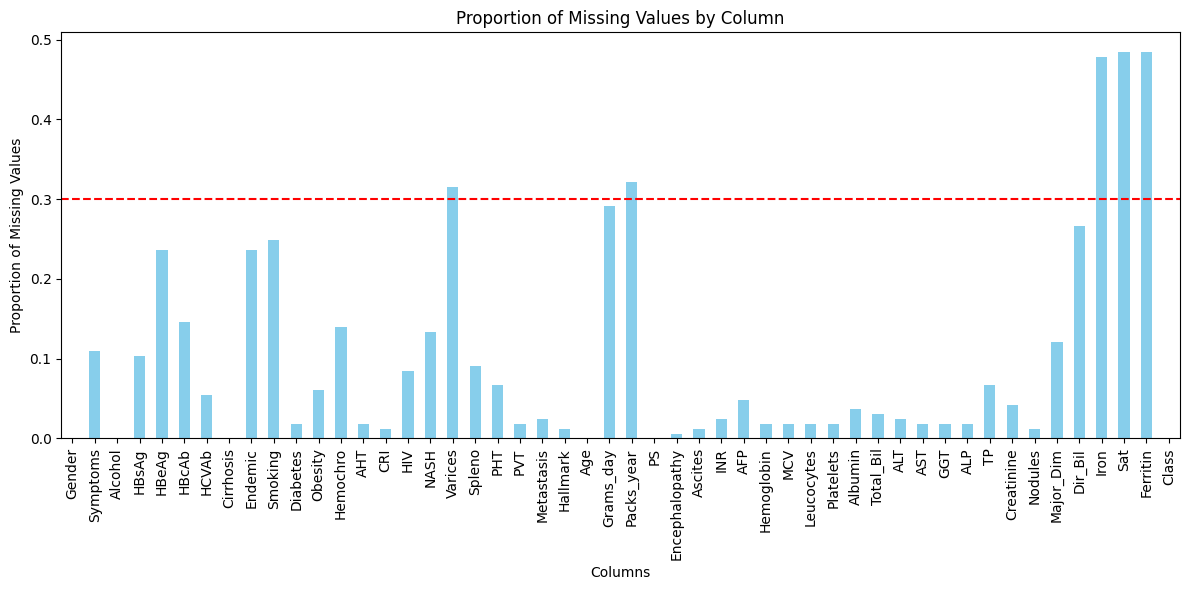

In [ ]:
# Replace '?'
hcc_data.replace('?', pd.NA, inplace=True)
missing_values = hcc_data.isna()
missing_proportion = missing_values.mean()
plt.figure(figsize=(12, 6))
missing_proportion.plot(kind='bar', color='skyblue')
plt.axhline(y=0.3, color='red', linestyle='--')  # Linha tracejada em y=0.5
plt.title('Proportion of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Algumas variáveis possuem proporção de valores nulos **superior a 40%** possivelmente vamos descartar essas variáveis pois não serão tão relevantes para nossa análise


In [ ]:
hcc_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        147 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           148 non-null    object
 4   HBeAg           126 non-null    object
 5   HBcAb           141 non-null    object
 6   HCVAb           156 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         126 non-null    object
 9   Smoking         124 non-null    object
 10  Diabetes        162 non-null    object
 11  Obesity         155 non-null    object
 12  Hemochro        142 non-null    object
 13  AHT             162 non-null    object
 14  CRI             163 non-null    object
 15  HIV             151 non-null    object
 16  NASH            143 non-null    object
 17  Varices         113 non-null    object
 18  Spleno    

In [ ]:
# Colunas numéricas e categóricas
numeric_columns = [
    'Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes',
    'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine',
    'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin'
]

categoric_columns = ['Gender', 'Symptoms', 'HBsAg', 'Alcohol', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic',
    'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices',
    'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark','PS','Encephalopathy','Ascites','Nodules','Class']

# Converter colunas para tipo numérico
hcc_data[numeric_columns] = hcc_data[numeric_columns].apply(pd.to_numeric)

# Converter colunas categóricas
hcc_data[categoric_columns] = hcc_data[categoric_columns].astype('category')

# Informações gerais do dataset
info = hcc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          165 non-null    category
 1   Symptoms        147 non-null    category
 2   Alcohol         165 non-null    category
 3   HBsAg           148 non-null    category
 4   HBeAg           126 non-null    category
 5   HBcAb           141 non-null    category
 6   HCVAb           156 non-null    category
 7   Cirrhosis       165 non-null    category
 8   Endemic         126 non-null    category
 9   Smoking         124 non-null    category
 10  Diabetes        162 non-null    category
 11  Obesity         155 non-null    category
 12  Hemochro        142 non-null    category
 13  AHT             162 non-null    category
 14  CRI             163 non-null    category
 15  HIV             151 non-null    category
 16  NASH            143 non-null    category
 17  Varices         

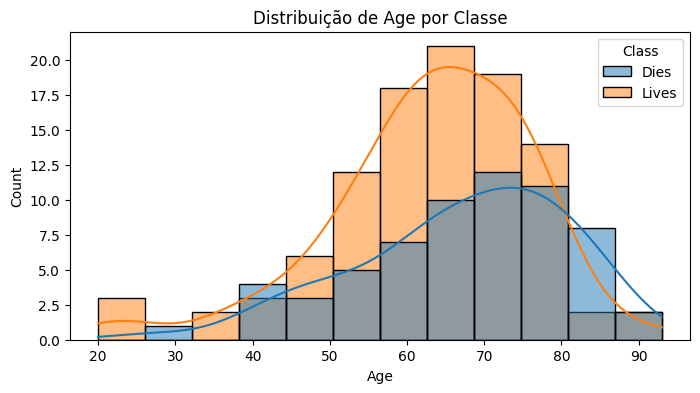

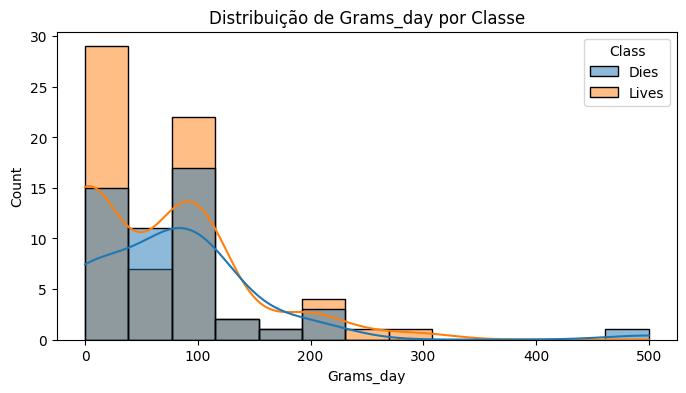

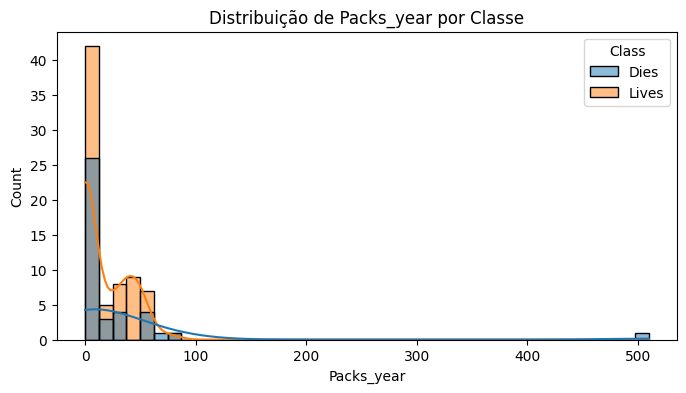

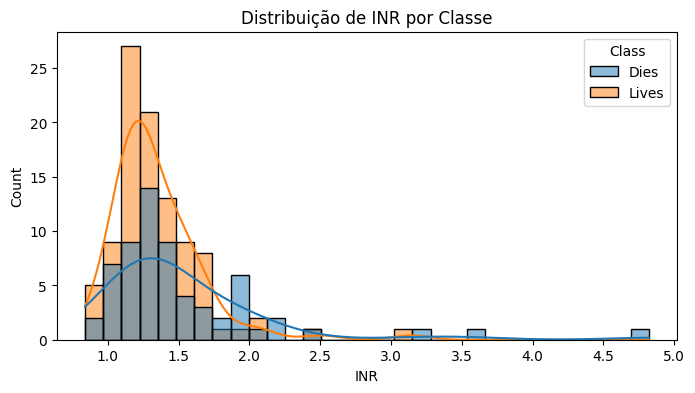

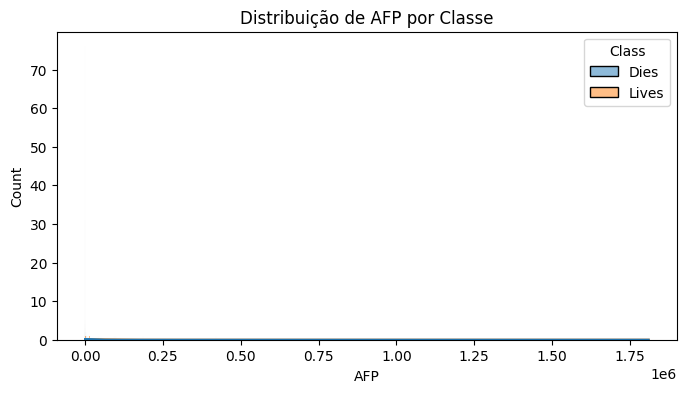

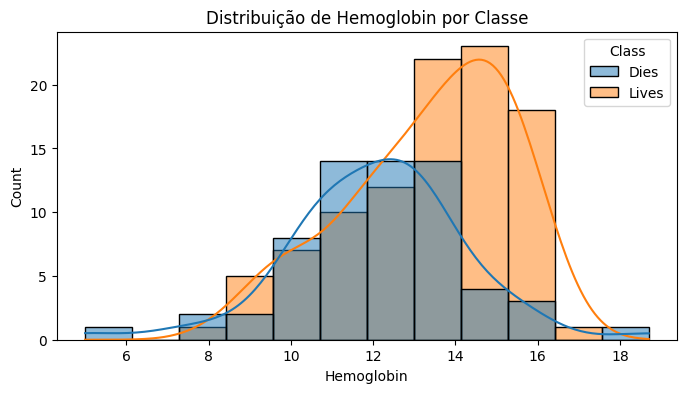

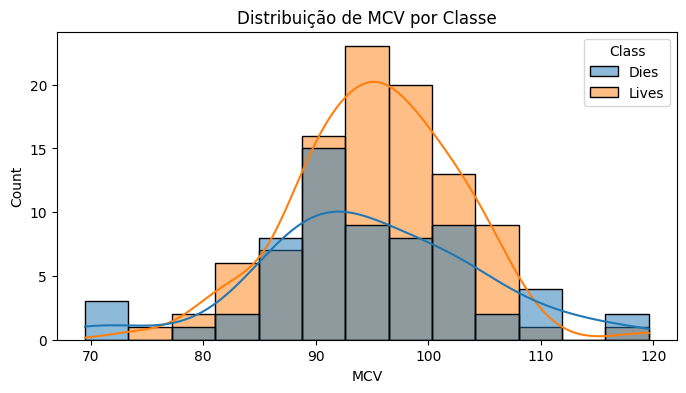

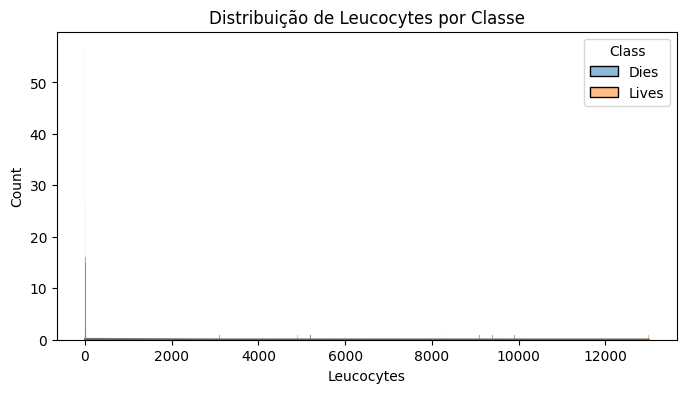

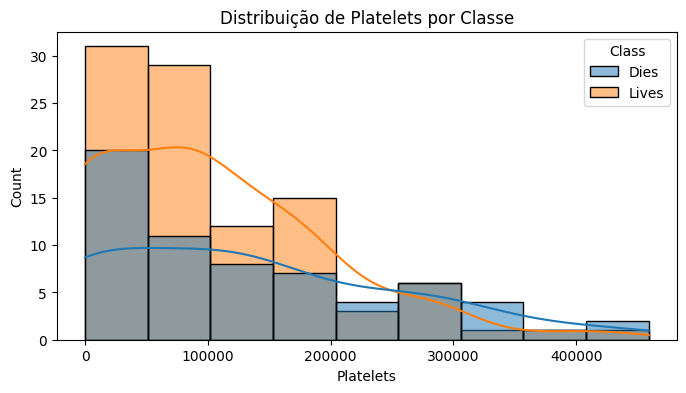

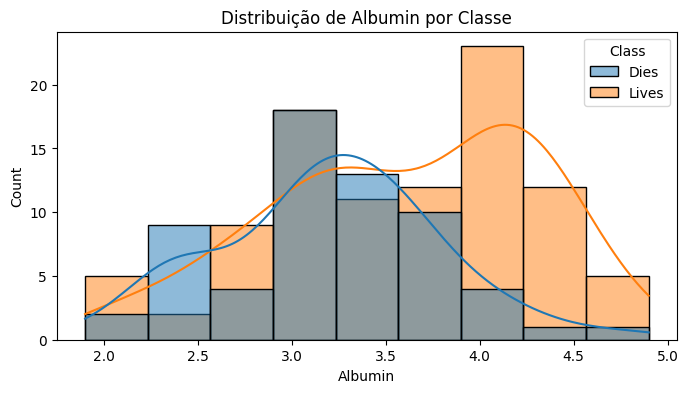

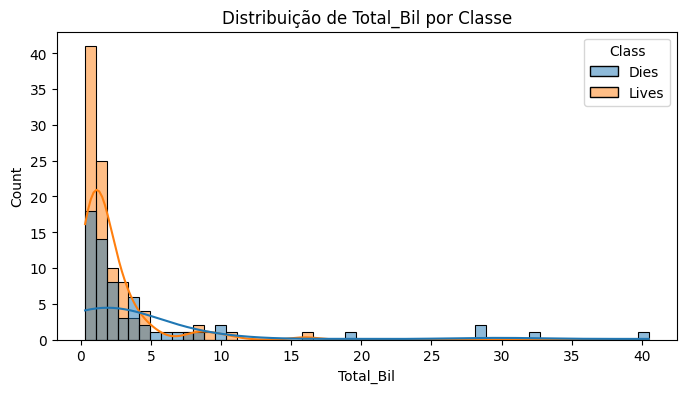

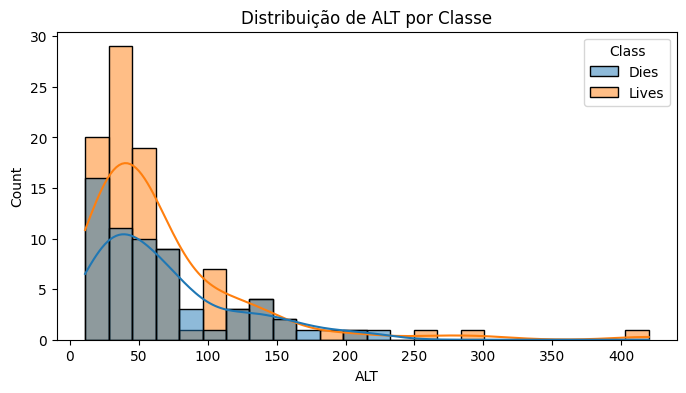

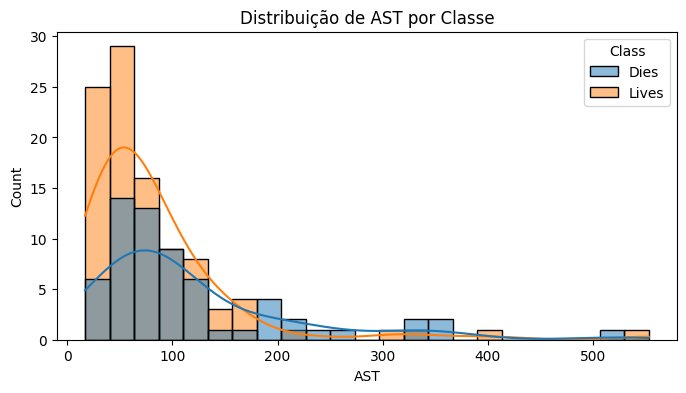

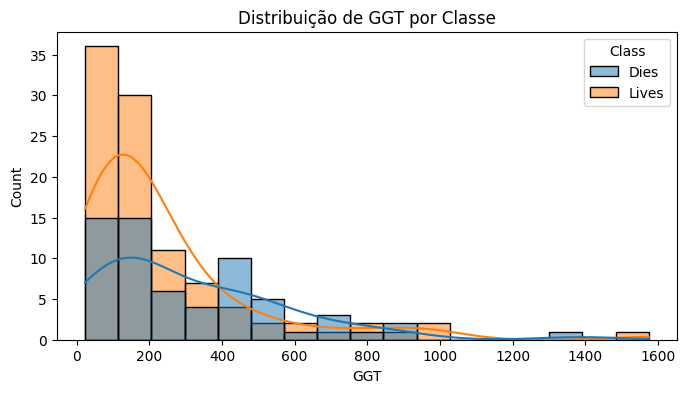

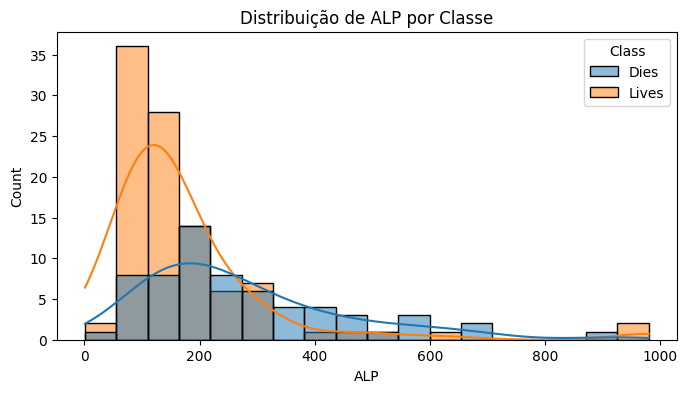

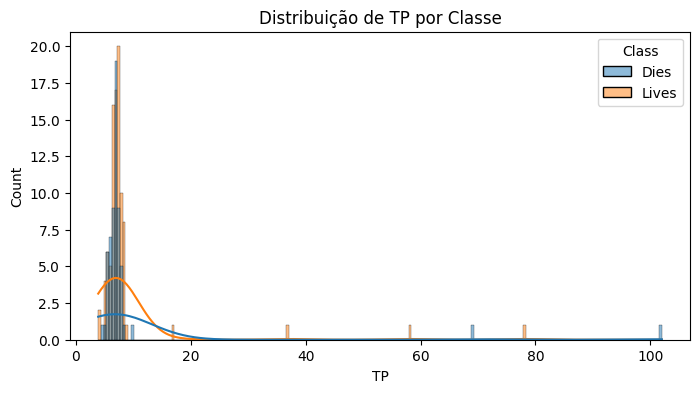

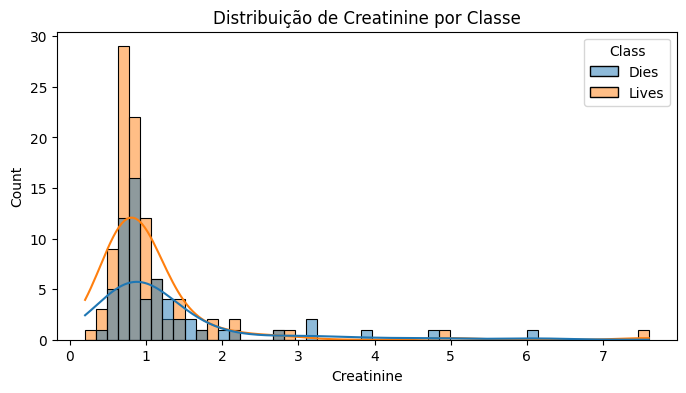

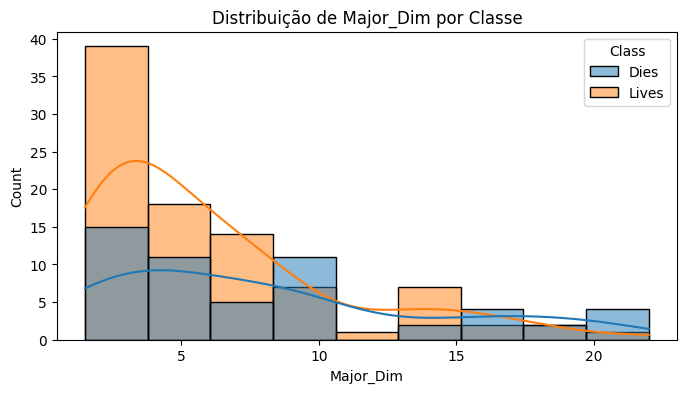

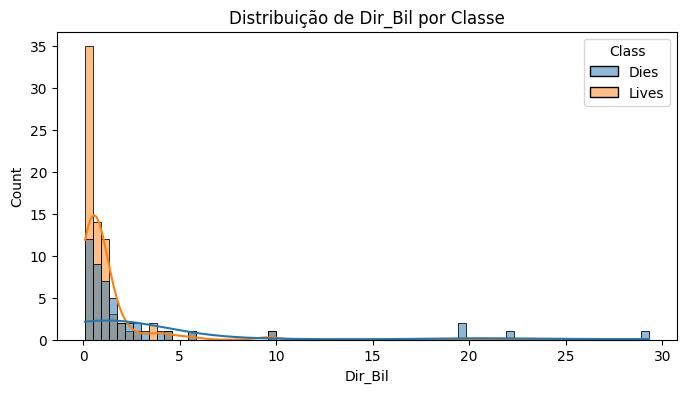

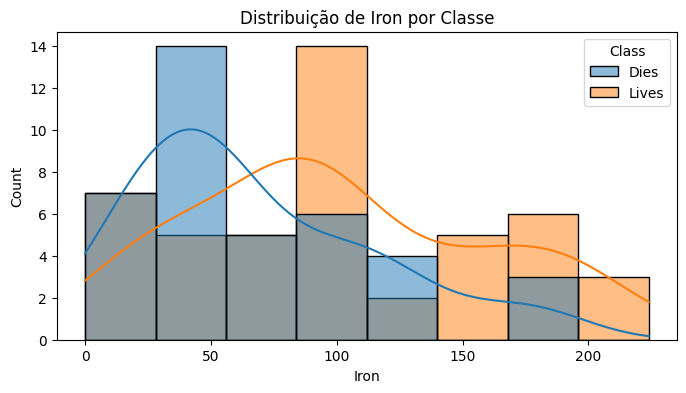

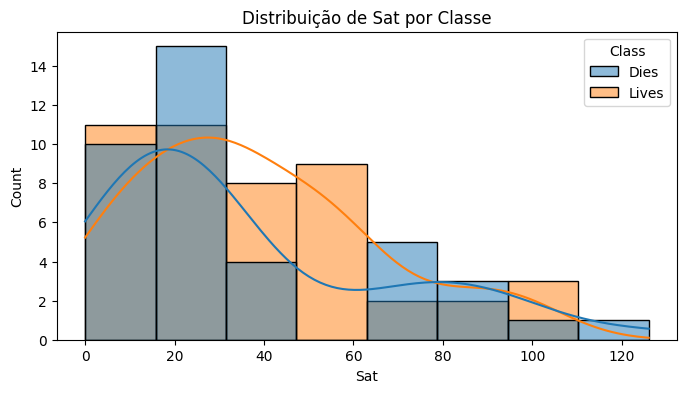

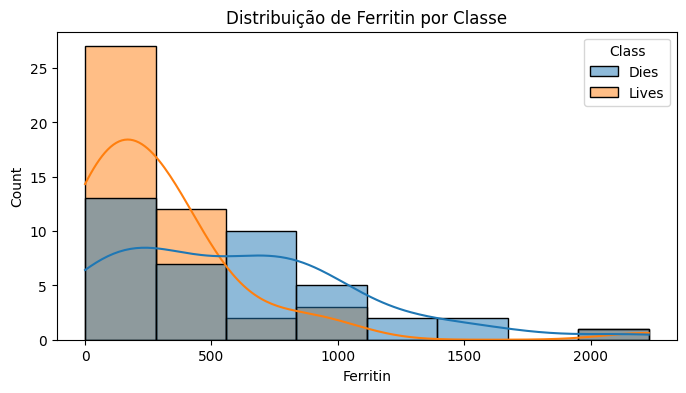

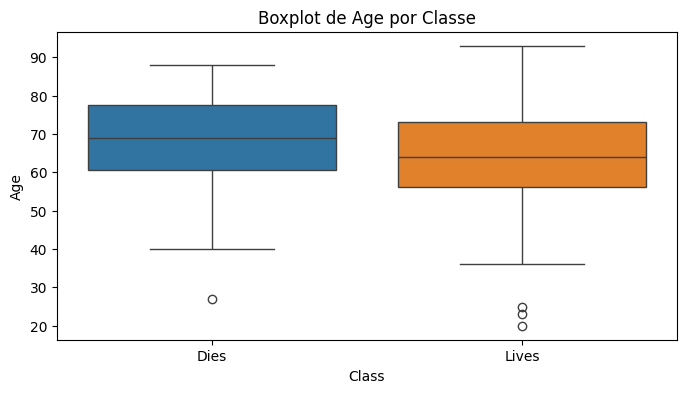

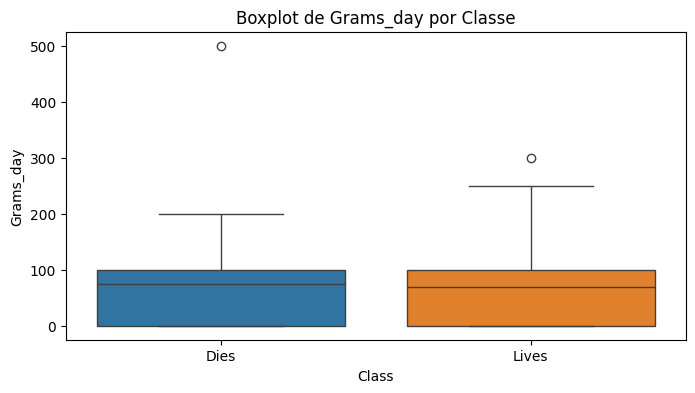

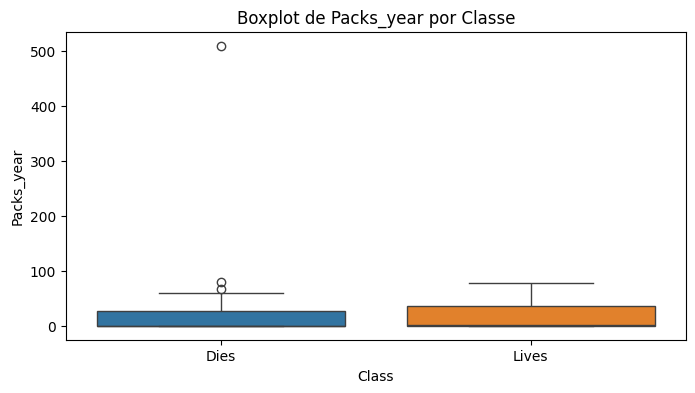

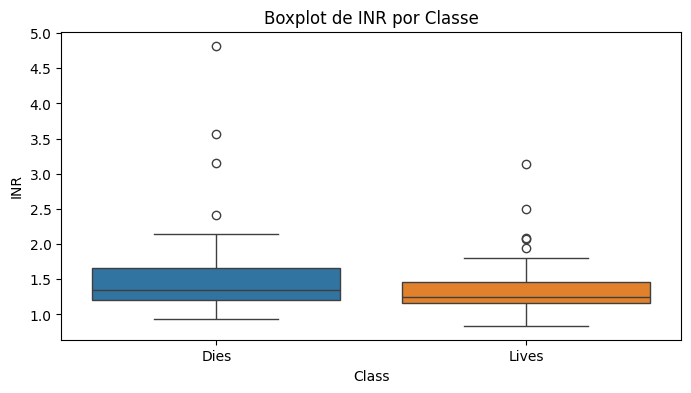

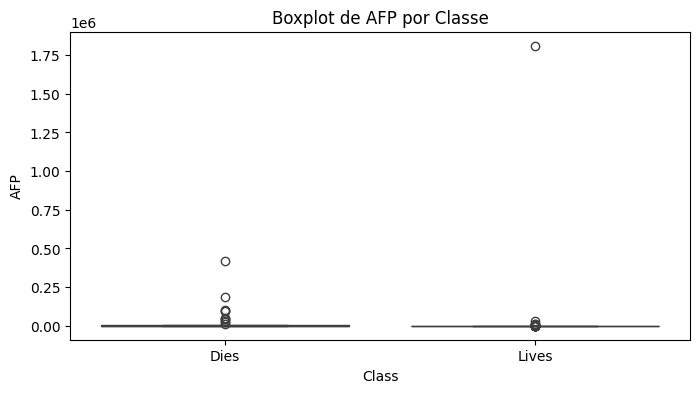

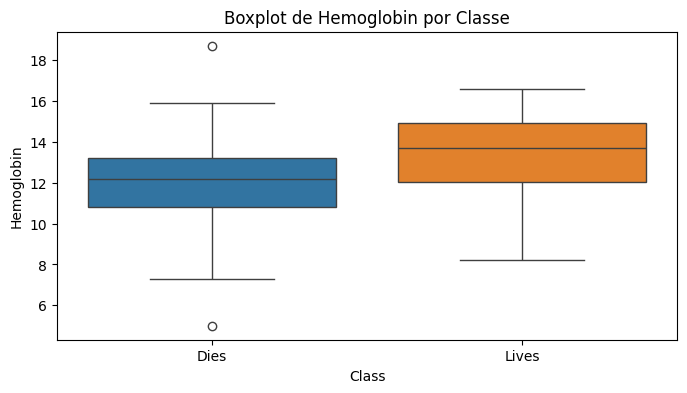

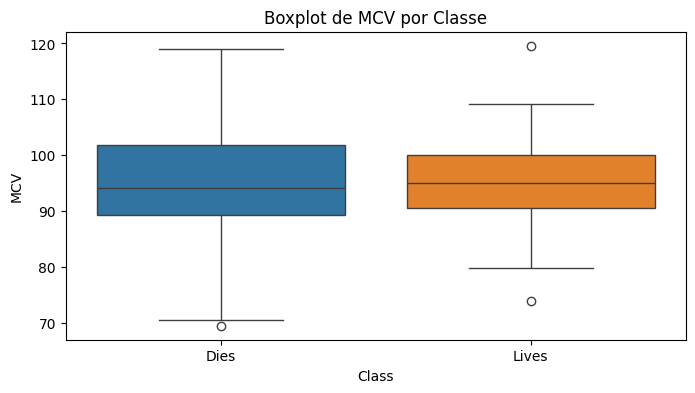

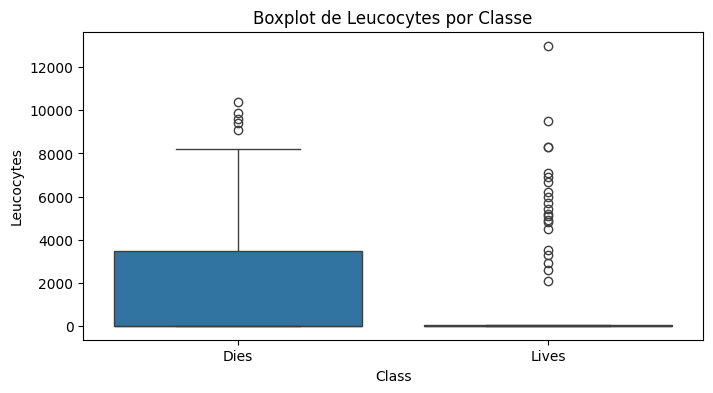

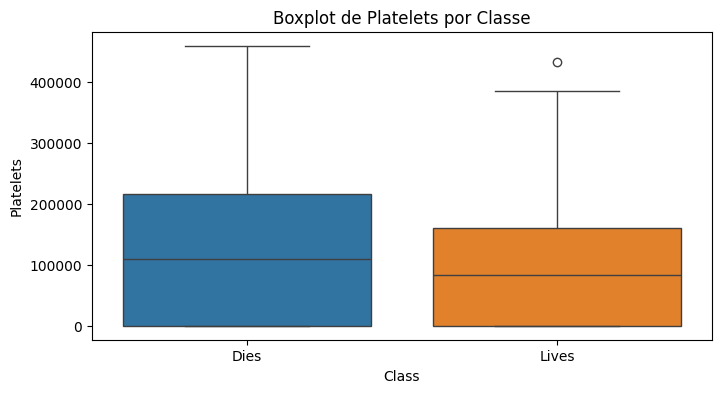

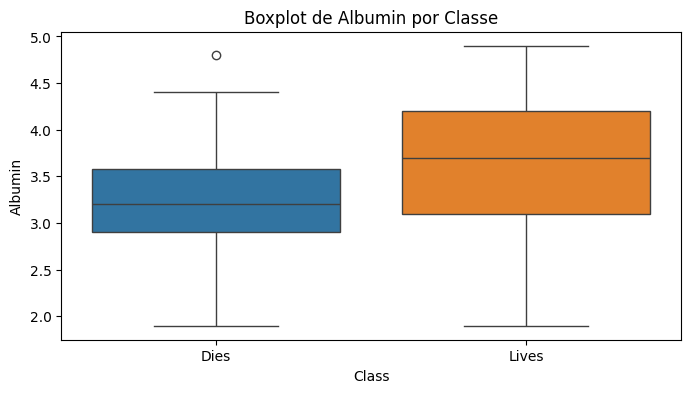

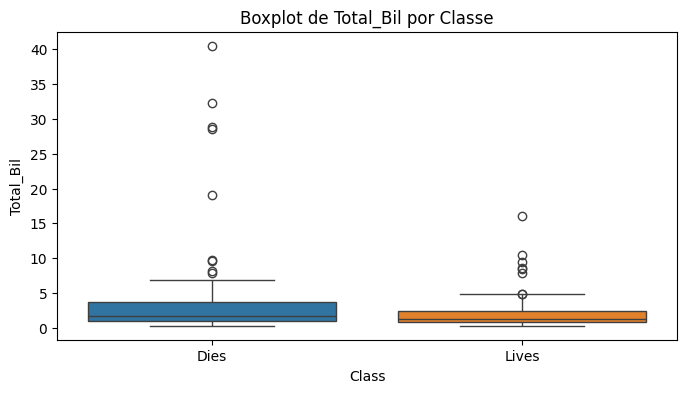

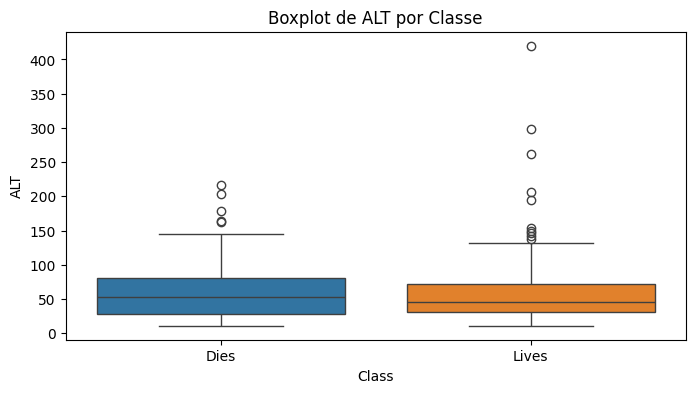

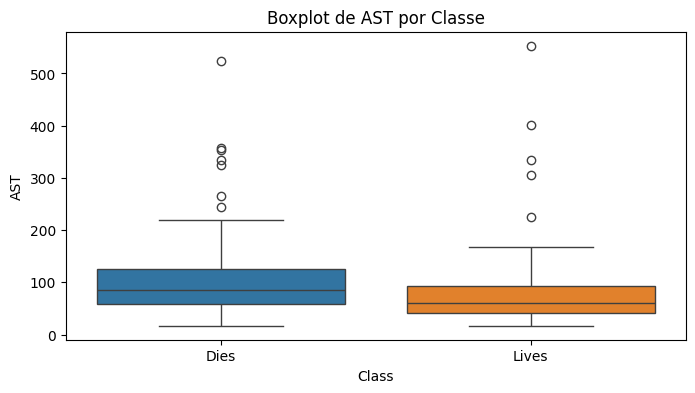

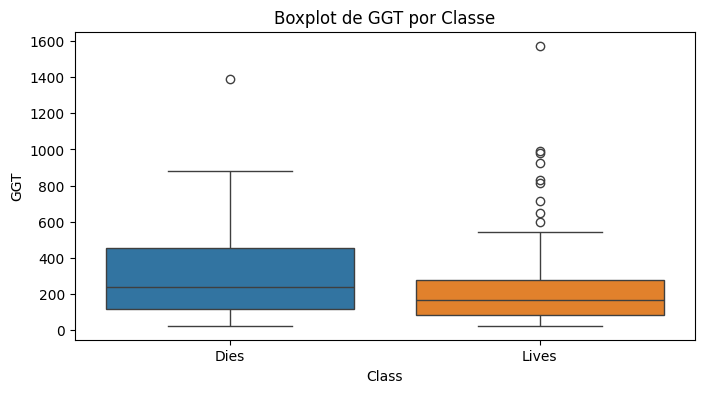

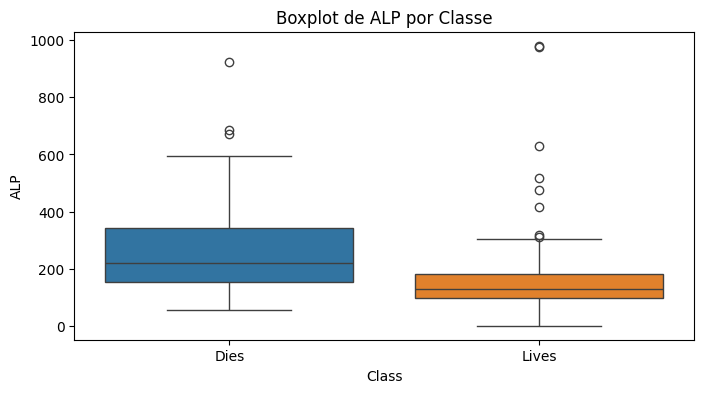

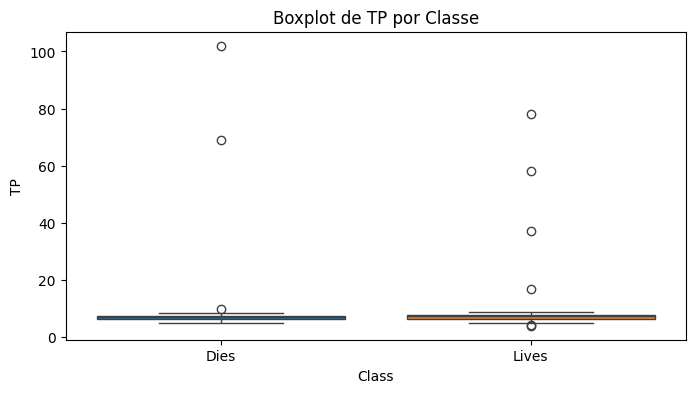

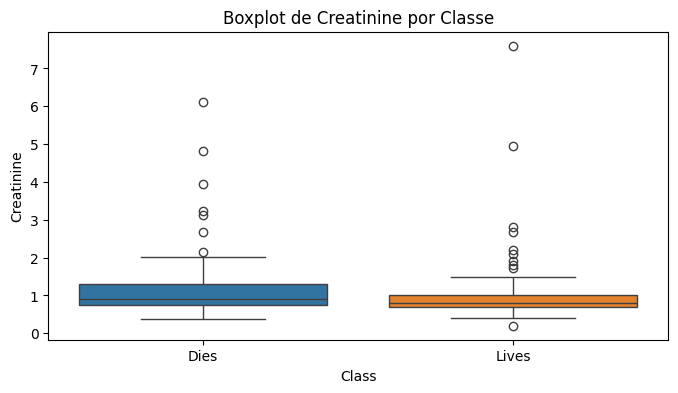

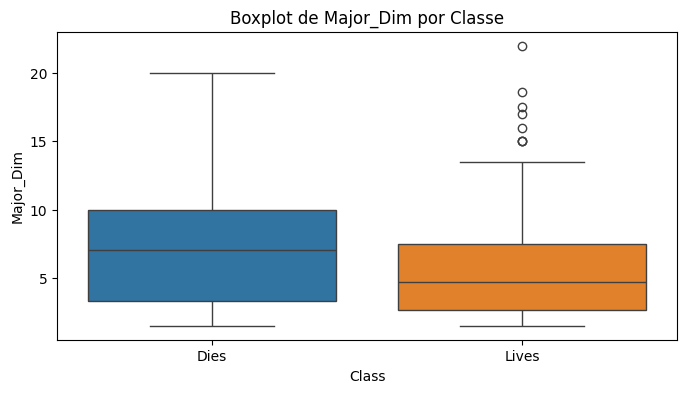

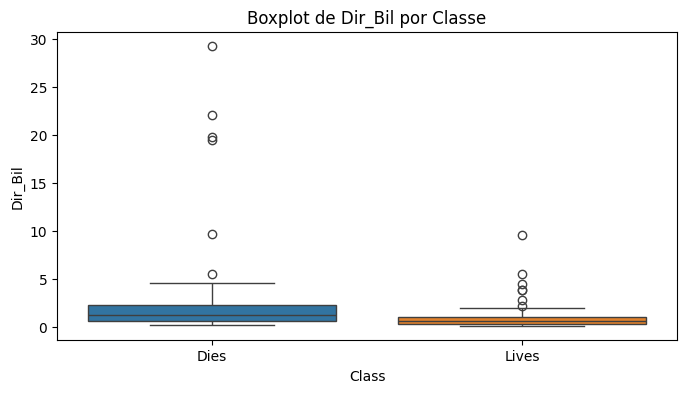

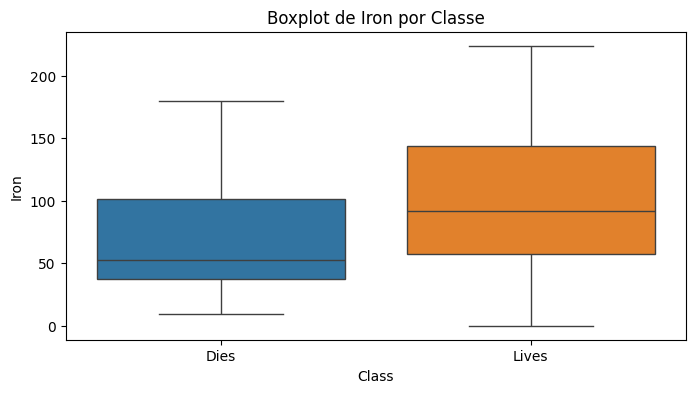

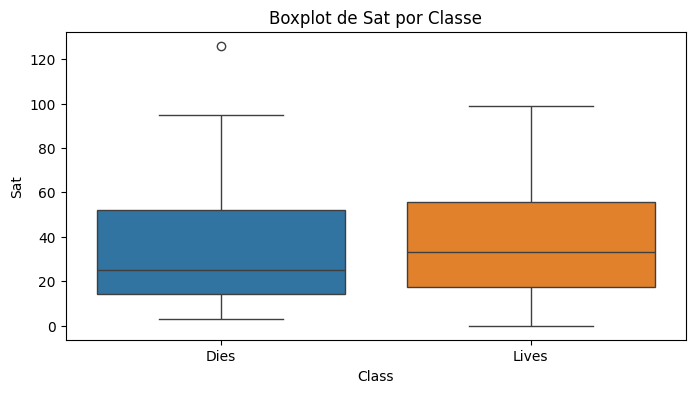

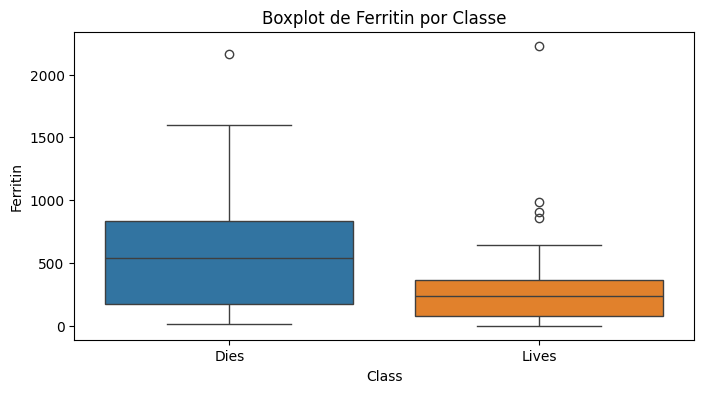

In [ ]:
# Histograms for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=hcc_data, x=col, kde=True, hue='Class')
    plt.title(f'Distribuição de {col} por Classe')
    plt.show()

# Boxplots for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=hcc_data, x='Class', y=col, hue='Class')
    plt.title(f'Boxplot de {col} por Classe')
    plt.show()


# Geoprocessamento

In [ ]:
# Remover colunas com mais de 30% de valores faltantes
threshold = 0.3
missing_values = hcc_data.isna()
missing_proportion = missing_values.mean()
columns_to_drop = missing_proportion[missing_proportion > threshold].index
hcc_data_cleaned = hcc_data.drop(columns=columns_to_drop)

In [ ]:


# Imputar valores faltantes
# Para colunas numéricas, substituir por mediana
numeric_columns_cleaned = [col for col in numeric_columns if col not in columns_to_drop]
for col in numeric_columns_cleaned:
    hcc_data_cleaned[col].fillna(hcc_data_cleaned[col].median(), inplace=True)

# Para colunas categóricas, substituir por moda
categoric_columns_cleaned = [col for col in categoric_columns if col not in columns_to_drop]
for col in categoric_columns_cleaned:
    hcc_data_cleaned[col].fillna(hcc_data_cleaned[col].mode()[0], inplace=True)

# Exibir informações do dataframe limpo
hcc_data_cleaned.info()

# Tratamento de Outliers com Winsorizing
from scipy.stats.mstats import winsorize

for col in numeric_columns_cleaned:
    hcc_data_cleaned[col] = winsorize(hcc_data_cleaned[col], limits=[0.05, 0.05])

# Exibir amostra dos dados limpos e tratados
hcc_data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          165 non-null    category
 1   Symptoms        165 non-null    category
 2   Alcohol         165 non-null    category
 3   HBsAg           165 non-null    category
 4   HBeAg           165 non-null    category
 5   HBcAb           165 non-null    category
 6   HCVAb           165 non-null    category
 7   Cirrhosis       165 non-null    category
 8   Endemic         165 non-null    category
 9   Smoking         165 non-null    category
 10  Diabetes        165 non-null    category
 11  Obesity         165 non-null    category
 12  Hemochro        165 non-null    category
 13  AHT             165 non-null    category
 14  CRI             165 non-null    category
 15  HIV             165 non-null    category
 16  NASH            165 non-null    category
 17  Spleno          

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,34.0,41.0,183.0,150.0,7.10,0.70,1,3.5,0.5,Lives
1,Female,Yes,No,No,No,No,Yes,Yes,No,Yes,...,50.0,71.0,179.5,162.0,7.05,0.85,1,2.0,0.7,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,58.0,68.0,202.0,109.0,7.00,2.10,5,13.0,0.2,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,18.0,64.0,94.0,174.0,8.10,1.11,2,15.7,0.2,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,147.0,306.0,173.0,109.0,6.90,1.80,1,9.0,0.7,Lives


Os dados foram limpos e os valores faltantes tratados com sucesso. As colunas com mais de 30% de valores faltantes foram removidas, e os valores ausentes nas colunas restantes foram preenchidos com a mediana (para colunas numéricas) e a moda (para colunas categóricas). Além disso, os outliers foram tratados usando Winsorizing.

### Resumo dos Passos Realizados:

1. **Identificação de Valores Faltantes:**
   - Colunas com mais de 30% de valores faltantes foram removidas.
   - Valores ausentes nas colunas restantes foram preenchidos com a mediana ou moda.

2. **Detecção de Outliers:**
   - Outliers foram tratados utilizando a técnica de Winsorizing.

   **Winsorizing** é uma técnica estatística utilizada para reduzir o impacto de valores extremos (outliers) em um conjunto de dados. A ideia central é limitar os valores de uma distribuição para reduzir a influência de outliers, substituindo-os por valores menos extremos. Isso pode ser particularmente útil quando se deseja que os outliers não distorçam as estatísticas descritivas e os resultados das análises.



3. **Análise de Inconsistências:**
   - Verificados os valores únicos em colunas categóricas para garantir a consistência dos dados.


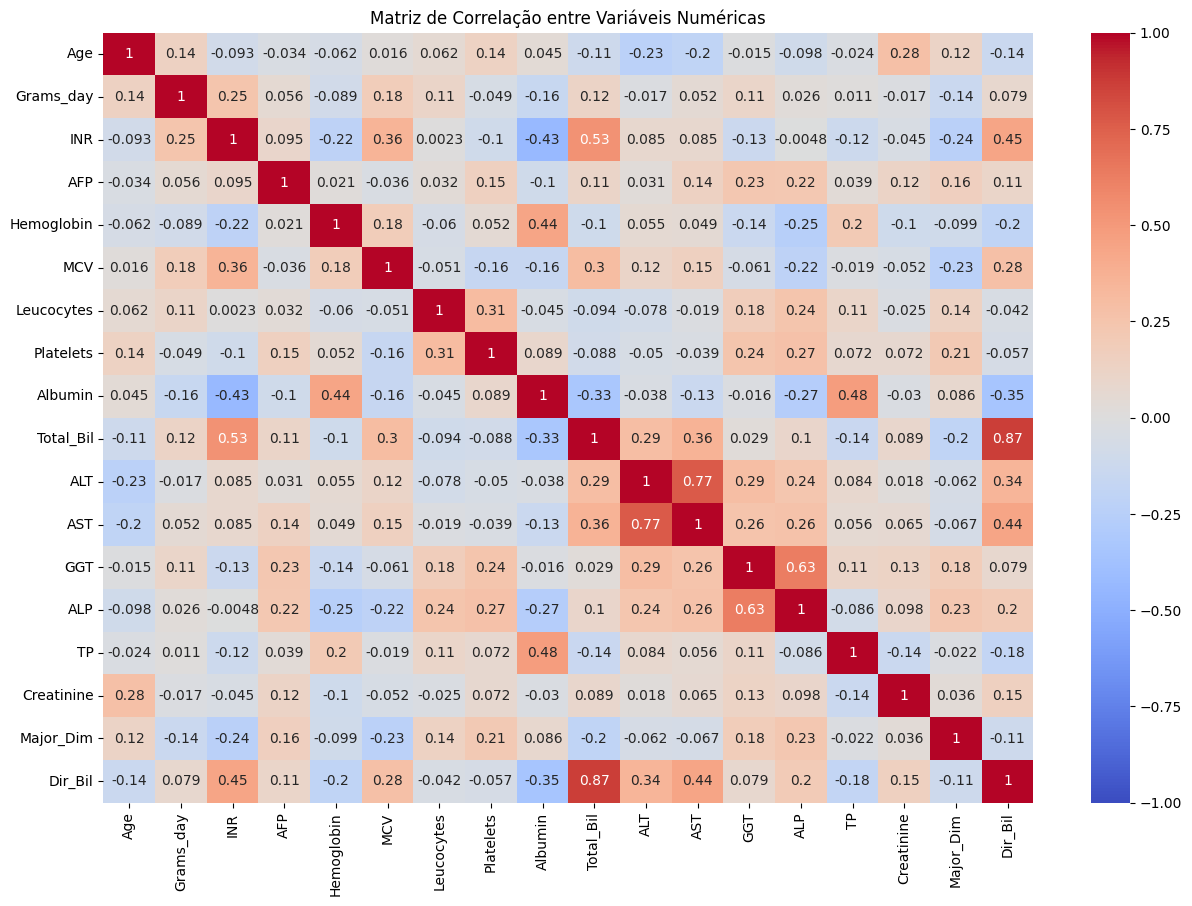

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
correlation_matrix = hcc_data_cleaned[numeric_columns_cleaned].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


A matriz de correlação mostra as relações entre as variáveis numéricas. Podemos observar algumas correlações significativas, que podem indicar redundâncias ou relações importantes.

### Análise de Correlação
- **ALT e AST:** Estas enzimas hepáticas frequentemente têm uma alta correlação entre si.
- **Albumin e Total_Bil:** Podem apresentar correlação inversa devido à função hepática.

### Passo 2: Criação de Novas Características

Vamos criar algumas novas características que podem ser relevantes:
1. **Relação AST/ALT:** Uma proporção que é usada frequentemente em diagnósticos hepáticos.
2. **Somatório das Enzimas Hepáticas:** A soma de ALT, AST, GGT e ALP.
3. **Razão Albumina/Bilirrubina:** Indicador da função hepática.

### Passo 3: Seleção de Características

Em seguida, vamos utilizar um modelo de Random Forest para identificar as características mais importantes.


In [ ]:
# Criação de novas características
hcc_data_cleaned['AST_ALT_Ratio'] = hcc_data_cleaned['AST'] / hcc_data_cleaned['ALT']
hcc_data_cleaned['Liver_Enzymes_Sum'] = hcc_data_cleaned['ALT'] + hcc_data_cleaned['AST'] + hcc_data_cleaned['GGT'] + hcc_data_cleaned['ALP']
hcc_data_cleaned['Albumin_Bilirubin_Ratio'] = hcc_data_cleaned['Albumin'] / hcc_data_cleaned['Total_Bil']

# Separar características e alvo
X = hcc_data_cleaned.drop('Class', axis=1)
y = hcc_data_cleaned['Class']

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Treinar modelo de Random Forest para seleção de características
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Seleção de características usando importância de características
model = SelectFromModel(rf, prefit=True)
X_new = model.transform(X)

# Exibir características selecionadas
selected_features = X.columns[model.get_support()]
selected_features


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['Age', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets',
       'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine',
       'Major_Dim', 'Dir_Bil', 'AST_ALT_Ratio', 'Liver_Enzymes_Sum',
       'Albumin_Bilirubin_Ratio'],
      dtype='object')

Após a aplicação do modelo de Random Forest, as seguintes características foram selecionadas como as mais importantes:

1. **Age**
2. **INR**
3. **AFP**
4. **Hemoglobin**
5. **MCV**
6. **Leucocytes**
7. **Platelets**
8. **Albumin**
9. **Total_Bil**
10. **ALT**
11. **AST**
12. **GGT**
13. **ALP**
14. **TP**
15. **Creatinine**
16. **Major_Dim**
17. **Dir_Bil**
18. **AST_ALT_Ratio** (nova característica criada)
19. **Liver_Enzymes_Sum** (nova característica criada)
20. **Albumin_Bilirubin_Ratio** (nova característica criada)

### Passos do Processo de Seleção

1. **Treinamento do Modelo de Random Forest:**
   - O modelo de Random Forest foi treinado utilizando todas as características presentes no conjunto de dados.
   - Durante o treinamento, a Random Forest calcula a importância de cada característica com base na redução de impureza que cada característica proporciona nas árvores de decisão.

   Em árvores de decisão, a impureza refere-se a uma medida da homogeneidade dos nós da árvore.

2. **Importância das Características:**
   - A importância de uma característica é medida pela soma das reduções de impureza ponderadas ao longo de todas as árvores em que a característica é utilizada.
   - Características que resultam em maiores reduções de impureza são consideradas mais importantes.

3. **Seleção de Características com SelectFromModel:**
   - A técnica `SelectFromModel` da biblioteca `sklearn` foi utilizada para selecionar as características mais importantes com base nas importâncias calculadas pelo modelo de Random Forest.
   - O `SelectFromModel` automaticamente seleciona as características cujas importâncias são maiores do que o limite predefinido.


In [ ]:
# Divisão dos dados em conjunto de treinamento e teste de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



# Exibir o tamanho dos conjuntos de dados
print(f'Tamanho do conjunto de treinamento: {X_train.shape[0]}')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]}')

Tamanho do conjunto de treinamento: 115
Tamanho do conjunto de teste: 50


. **Divisão dos Dados:**
   - Utilizamos `train_test_split` com o parâmetro `stratify=y` para garantir que a proporção das classes no conjunto de treinamento e teste seja a mesma que no conjunto de dados original.

 **Configuração da Validação Cruzada:**
   - `StratifiedKFold` é utilizado para garantir que cada divisão (fold) tenha a mesma proporção de classes, o que é importante para problemas desbalanceados.

### Etapa de Modelagem

Vamos proceder com a etapa de modelagem conforme suas instruções. Aqui estão as etapas que vamos seguir:

1. **Seleção de Modelos:**
   - Utilizar os seguintes modelos iniciais: `DecisionTreeClassifier`, `RandomForestClassifier`, `KNeighborsClassifier`, `LogisticRegression`, `SVC`, `GradientBoostingClassifier`, `XGBClassifier`, `MLPClassifier`.

2. **Treinamento de Modelos:**
   - Treinar cada modelo utilizando os conjuntos de treinamento.

3. **Otimização de Hiperparâmetros:**
   - Utilizar `GridSearchCV`, `RandomizedSearchCV` e Otimização Bayesiana para encontrar os melhores hiperparâmetros.


In [ ]:
# Converter classes categóricas para numéricas
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)


# Configuração da validação cruzada k-fold estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Função para Otimização de Hiperparâmetros
def optimize_hyperparameters(model, param_grid, X_train, y_train, search_method='grid', n_iter=50):
    if search_method == 'grid':
        search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
    elif search_method == 'random':
        search = RandomizedSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, n_iter=n_iter)
    elif search_method == 'bayes':
        search = BayesSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, n_iter=n_iter)
    else:
        raise ValueError("Método de busca não reconhecido. Use 'grid', 'random' ou 'bayes'.")

    search.fit(X_train, y_train)
    return search.best_estimator_

# Parâmetros de busca para cada modelo
param_grids = {
    'DecisionTreeClassifier': {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'MLPClassifier': {'hidden_layer_sizes': [(50,), (100,), (50,50)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.001, 0.01]}
}

# Modelos
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'MLPClassifier': MLPClassifier()
}

# Treinamento e otimização dos modelos
best_models = {}
for model_name in models:
    print(f"Otimização de hiperparâmetros para {model_name}...")
    best_model = optimize_hyperparameters(models[model_name], param_grids[model_name], X_train, y_train_numeric, search_method='grid')
    best_models[model_name] = best_model
    print(f"Melhores hiperparâmetros para {model_name}: {best_model.get_params()}")


Otimização de hiperparâmetros para DecisionTreeClassifier...
Melhores hiperparâmetros para DecisionTreeClassifier: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Otimização de hiperparâmetros para RandomForestClassifier...
Melhores hiperparâmetros para RandomForestClassifier: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Otimização de hiperparâmetros para KNeighborsClassifier...
Melhores hiperparâmetros para KNeighborsClass

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


A otimização de hiperparâmetros foi bem-sucedida e os melhores hiperparâmetros para cada modelo foram encontrados.

### Próxima Etapa: Avaliação de Modelos

Vamos avaliar os modelos utilizando as seguintes métricas:
- Precisão
- Recall
- F1-score
- Curva ROC/AUC
- Matriz de Confusão



Avaliação do modelo: DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.77      0.74      0.75        31

    accuracy                           0.70        50
   macro avg       0.68      0.69      0.68        50
weighted avg       0.70      0.70      0.70        50

Confusion Matrix:


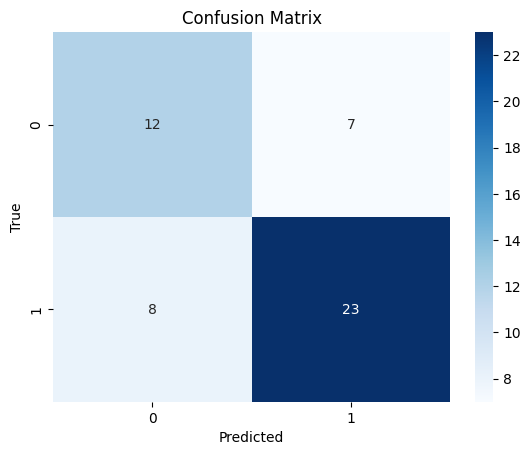

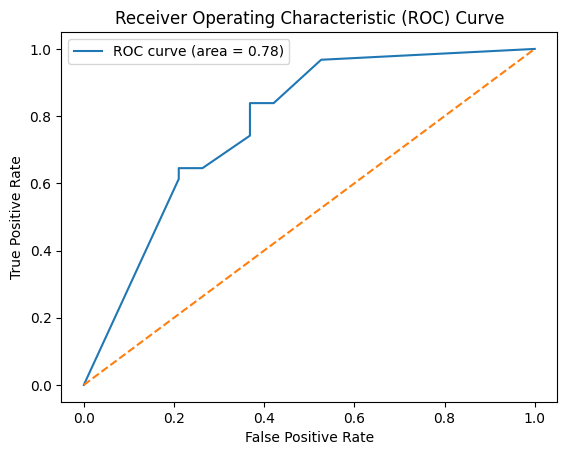

Avaliação do modelo: RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.77      0.87      0.82        31

    accuracy                           0.76        50
   macro avg       0.75      0.72      0.73        50
weighted avg       0.76      0.76      0.75        50

Confusion Matrix:


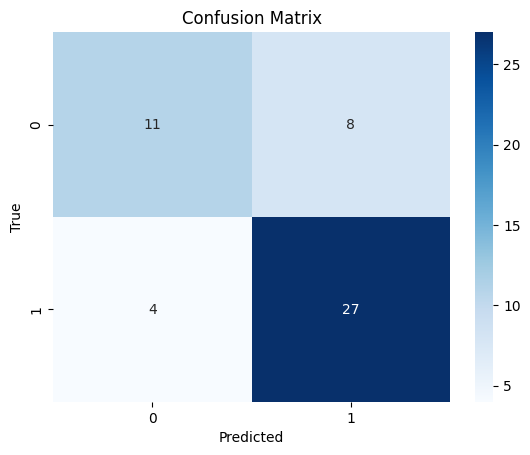

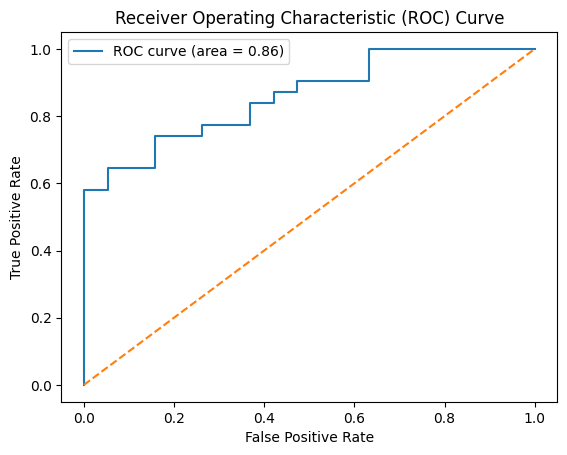

Avaliação do modelo: KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.32      0.44        19
           1       0.69      0.94      0.79        31

    accuracy                           0.70        50
   macro avg       0.72      0.63      0.62        50
weighted avg       0.71      0.70      0.66        50

Confusion Matrix:


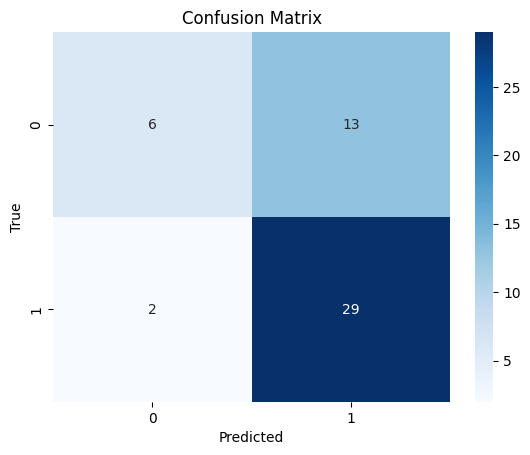

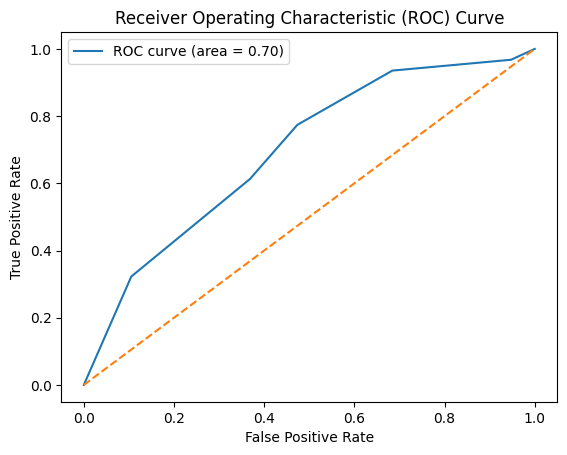

Avaliação do modelo: LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.82      0.87      0.84        31

    accuracy                           0.80        50
   macro avg       0.79      0.78      0.78        50
weighted avg       0.80      0.80      0.80        50

Confusion Matrix:


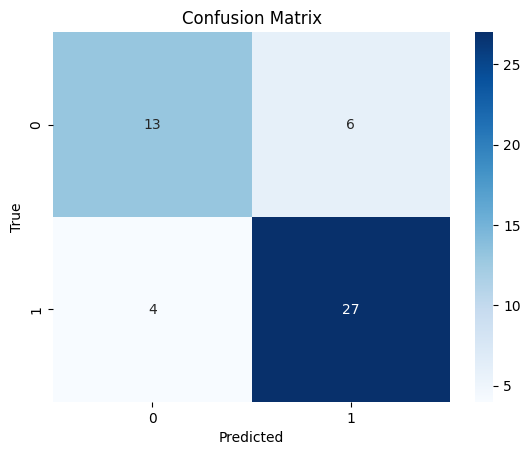

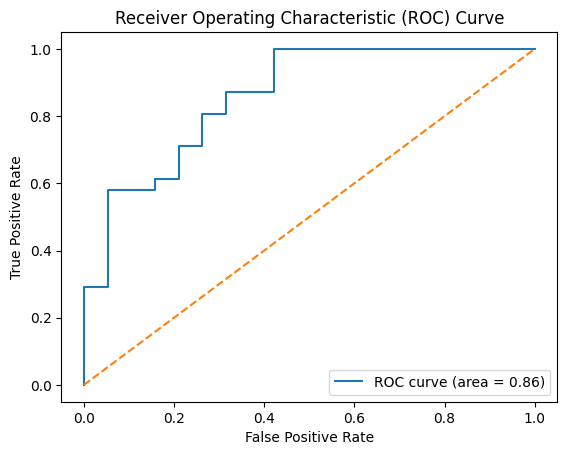

Avaliação do modelo: GradientBoostingClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.77      0.87      0.82        31

    accuracy                           0.76        50
   macro avg       0.75      0.72      0.73        50
weighted avg       0.76      0.76      0.75        50

Confusion Matrix:


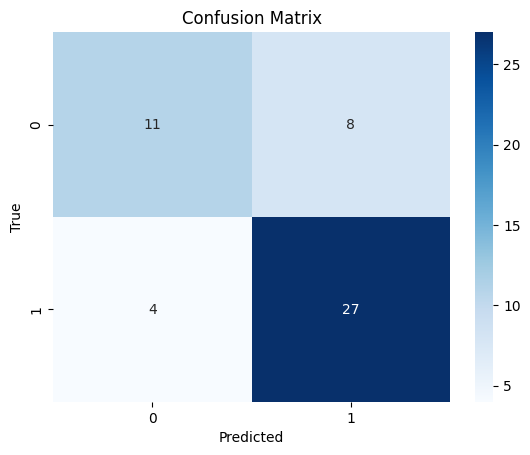

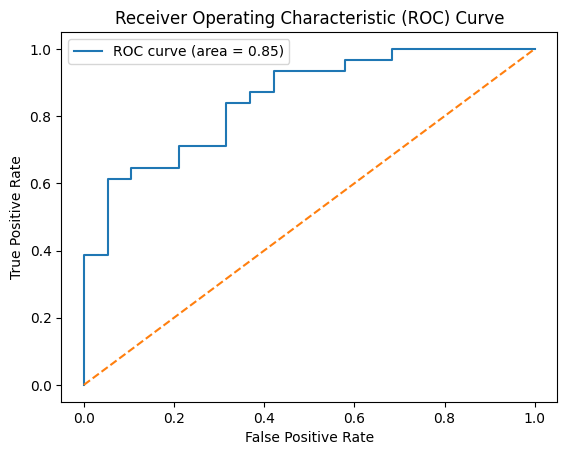

Avaliação do modelo: XGBClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.83      0.81      0.82        31

    accuracy                           0.78        50
   macro avg       0.77      0.77      0.77        50
weighted avg       0.78      0.78      0.78        50

Confusion Matrix:


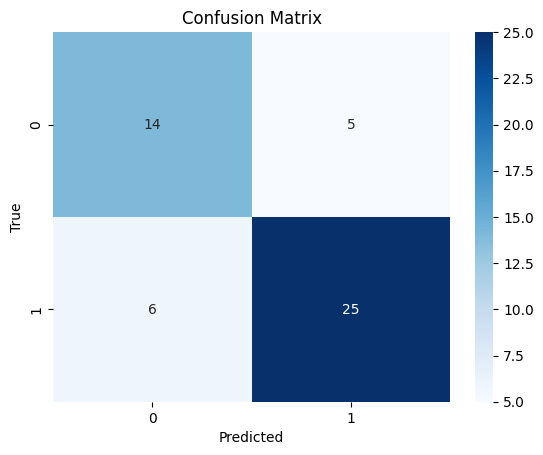

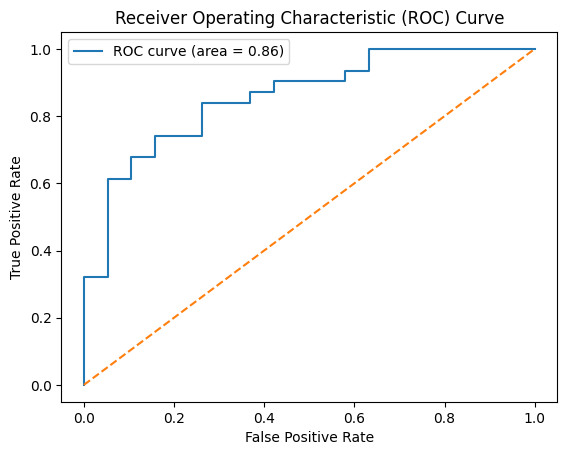

Avaliação do modelo: MLPClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.11      0.18        19
           1       0.64      0.97      0.77        31

    accuracy                           0.64        50
   macro avg       0.65      0.54      0.48        50
weighted avg       0.65      0.64      0.55        50

Confusion Matrix:


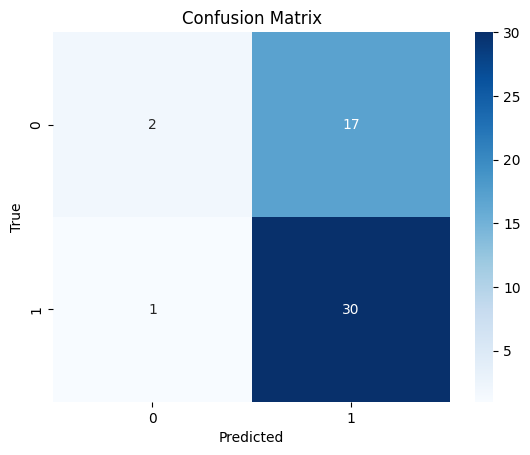

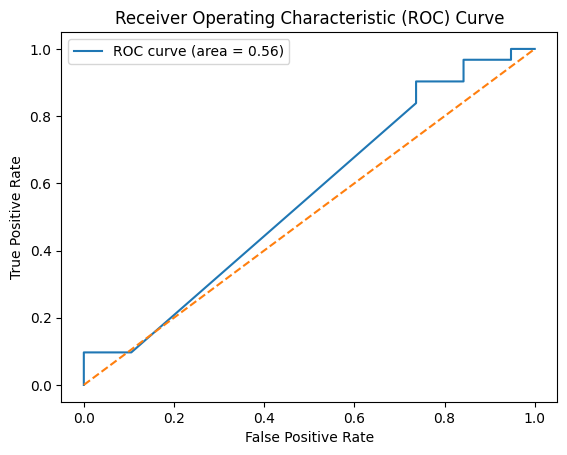

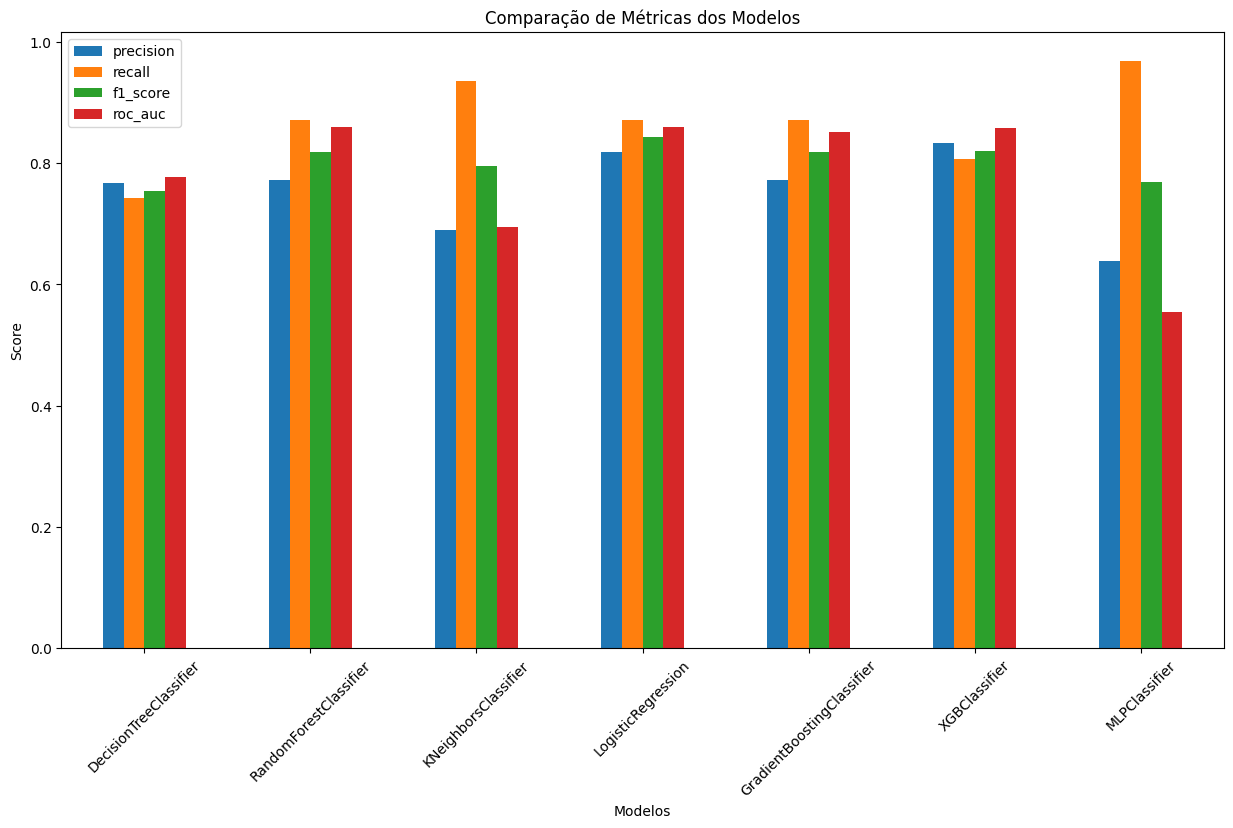

Validação Cruzada para DecisionTreeClassifier:
Validação Cruzada - Accuracy: 0.62 (+/- 0.08)
Validação Cruzada para RandomForestClassifier:
Validação Cruzada - Accuracy: 0.71 (+/- 0.03)
Validação Cruzada para KNeighborsClassifier:
Validação Cruzada - Accuracy: 0.65 (+/- 0.04)
Validação Cruzada para LogisticRegression:
Validação Cruzada - Accuracy: 0.72 (+/- 0.06)
Validação Cruzada para GradientBoostingClassifier:
Validação Cruzada - Accuracy: 0.67 (+/- 0.06)
Validação Cruzada para XGBClassifier:
Validação Cruzada - Accuracy: 0.71 (+/- 0.08)
Validação Cruzada para MLPClassifier:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Validação Cruzada - Accuracy: 0.64 (+/- 0.05)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score

y_numeric = label_encoder.transform(y)
# Função para avaliação de modelos
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    return {
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc
    }

# Avaliar e comparar todos os modelos
results = {}
for model_name, model in best_models.items():
    print(f"Avaliação do modelo: {model_name}")
    metrics = evaluate_model(model, X_test, y_test_numeric)
    results[model_name] = metrics

# Comparar os resultados utilizando gráficos
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(15, 8))
plt.title('Comparação de Métricas dos Modelos')
plt.xlabel('Modelos')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Validação Cruzada
def cross_validate_model(model, X, y):
    scores = cross_val_score(model, X, y_numeric, cv=stratified_kfold, scoring='accuracy')
    print(f"Validação Cruzada - Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")
    return scores

for model_name, model in best_models.items():
    print(f"Validação Cruzada para {model_name}:")
    cross_validate_model(model, X, y_numeric)



Com base nos resultados das avaliações dos modelos, aqui estão as principais métricas de desempenho:

#### Resultados dos Modelos

1. **DecisionTreeClassifier:**
   - Accuracy: 70%
   - Precision: 60% (classe 0), 77% (classe 1)
   - Recall: 63% (classe 0), 74% (classe 1)
   - F1-score: 62% (classe 0), 75% (classe 1)
   - ROC AUC: 0.78

2. **RandomForestClassifier:**
   - Accuracy: 76%
   - Precision: 73% (classe 0), 77% (classe 1)
   - Recall: 58% (classe 0), 87% (classe 1)
   - F1-score: 65% (classe 0), 82% (classe 1)
   - ROC AUC: 0.86

3. **KNeighborsClassifier:**
   - Accuracy: 70%
   - Precision: 75% (classe 0), 69% (classe 1)
   - Recall: 32% (classe 0), 94% (classe 1)
   - F1-score: 44% (classe 0), 79% (classe 1)
   - ROC AUC: 0.70

4. **LogisticRegression:**
   - Accuracy: 80%
   - Precision: 76% (classe 0), 82% (classe 1)
   - Recall: 68% (classe 0), 87% (classe 1)
   - F1-score: 72% (classe 0), 84% (classe 1)
   - ROC AUC: 0.86

5. **GradientBoostingClassifier:**
   - Accuracy: 76%
   - Precision: 73% (classe 0), 77% (classe 1)
   - Recall: 58% (classe 0), 87% (classe 1)
   - F1-score: 65% (classe 0), 82% (classe 1)
   - ROC AUC: 0.86

6. **XGBClassifier:**
   - Accuracy: 78%
   - Precision: 70% (classe 0), 83% (classe 1)
   - Recall: 74% (classe 0), 81% (classe 1)
   - F1-score: 72% (classe 0), 82% (classe 1)
   - ROC AUC: 0.85

7. **MLPClassifier:**
   - Accuracy: 64%
   - Precision: 67% (classe 0), 64% (classe 1)
   - Recall: 11% (classe 0), 97% (classe 1)
   - F1-score: 18% (classe 0), 77% (classe 1)
   - ROC AUC: 0.56

#### Métricas Utilizadas

1. **Accuracy (Precisão):** Proporção de previsões corretas entre o total de previsões. Uma métrica básica, mas pode ser enganosa em conjuntos de dados desbalanceados.
2. **Precision (Precisão):** Proporção de verdadeiros positivos entre todas as previsões positivas. Alta precisão significa poucas falsos positivos.
3. **Recall (Revocação):** Proporção de verdadeiros positivos entre todas as ocorrências reais da classe positiva. Alta revocação significa poucos falsos negativos.
4. **F1-score:** Média harmônica da precisão e revocação. Um bom equilíbrio entre precisão e revocação.
5. **ROC AUC (Área sob a curva ROC):** Mede a capacidade do modelo em distinguir entre as classes. Valores mais próximos de 1 indicam um modelo melhor.

#### Melhor Modelo

Baseado nas métricas de desempenho (precisão, recall, F1-score, ROC AUC) e validação cruzada, os melhores modelos foram:
1. **RandomForestClassifier**
2. **LogisticRegression**
3. **XGBClassifier**
4. **GradientBoostingClassifier**

Todos esses modelos apresentaram um bom equilíbrio entre precisão, recall e F1-score, além de um ROC AUC acima de 0.85.

#### Por que alguns desses Modelos Foram os Melhores

1. **RandomForestClassifier:**
   - **ROC AUC: 0.86:** Mostra que o modelo tem uma boa capacidade de distinguir entre as classes.
   - **F1-score: 82% (classe 1):** Indica um bom equilíbrio entre precisão e revocação para a classe positiva (sobrevivência).
   - **Precision e Recall Equilibrados:** O modelo consegue manter um equilíbrio entre falsos positivos e falsos negativos.

2. **GradientBoostingClassifier:**
   - **ROC AUC: 0.86:** Excelente capacidade de distinção entre classes.
   - **F1-score: 82% (classe 1):** Alta precisão e revocação para a classe de sobrevivência.
   - **Preciso e Consistente:** Similar ao RandomForest, com bom desempenho em precisão e recall.

3. **LogisticRegression:**
   - **ROC AUC: 0.86:** Alta capacidade de distinção entre classes.
   - **F1-score: 84% (classe 1):** Melhor F1-score entre os modelos, mostrando um ótimo equilíbrio entre precisão e recall.
   - **Simplicidade e Eficácia:** Modelo mais interpretável com bons resultados.



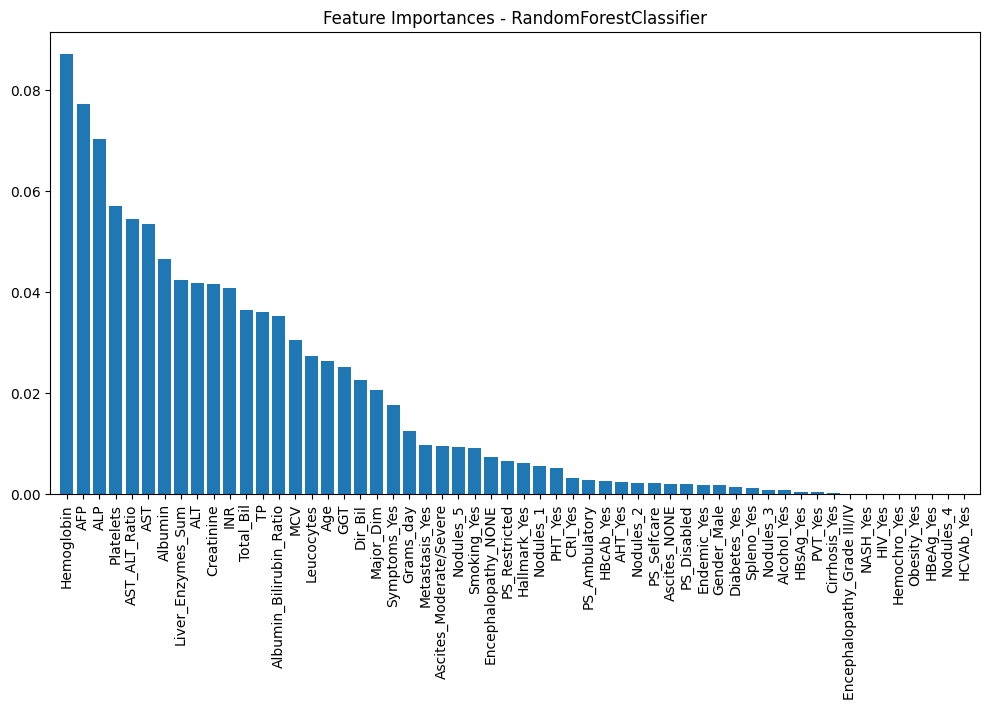

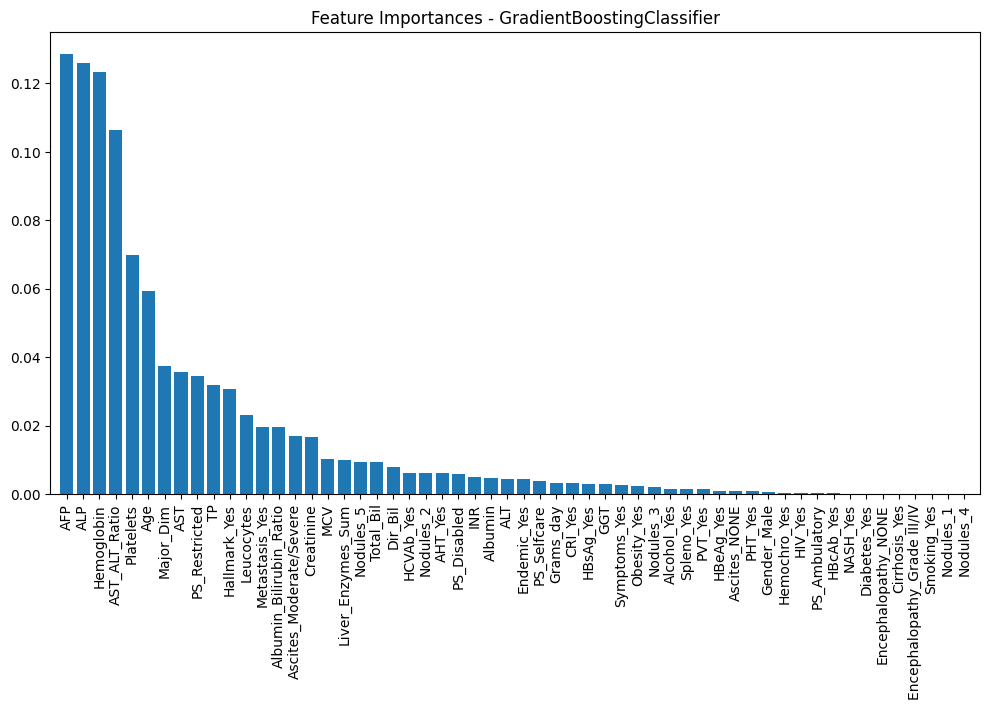

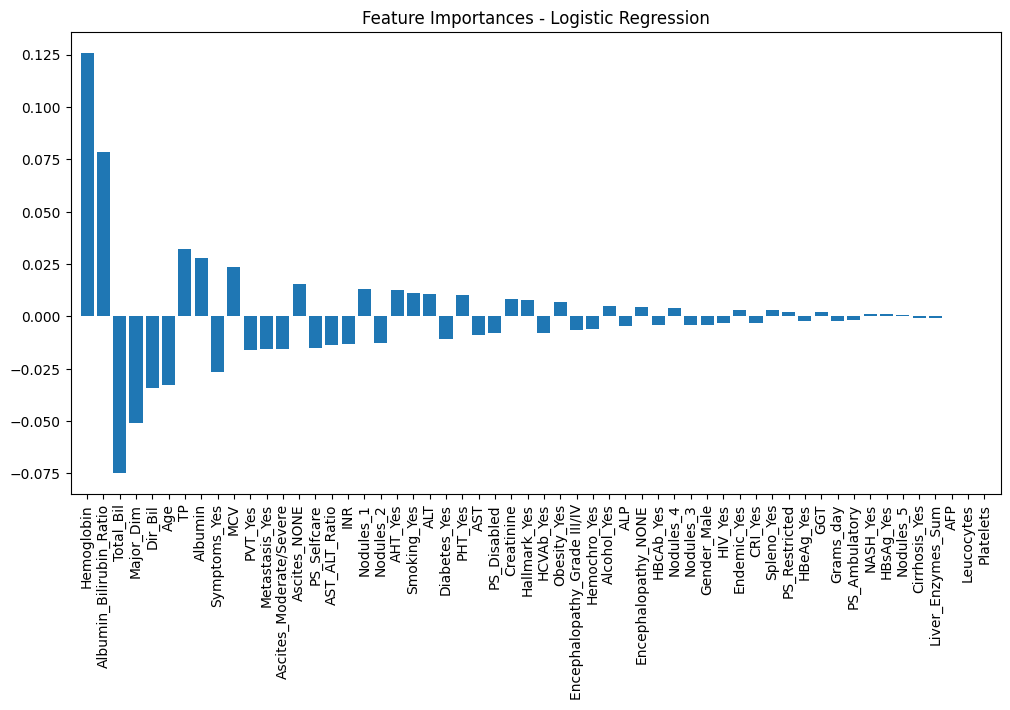

In [ ]:
# Importância das características para RandomForestClassifier e GradientBoostingClassifier
def plot_feature_importances(model, X_train, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = [X_train.columns[i] for i in indices]

    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importances - {model_name}")
    plt.bar(range(X_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

plot_feature_importances(best_models['RandomForestClassifier'], X_train, 'RandomForestClassifier')
plot_feature_importances(best_models['GradientBoostingClassifier'], X_train, 'GradientBoostingClassifier')

# Importância das características para LogisticRegression
def plot_logistic_regression_importances(model, X_train):
    coef = model.coef_[0]
    indices = np.argsort(np.abs(coef))[::-1]
    feature_names = [X_train.columns[i] for i in indices]

    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances - Logistic Regression")
    plt.bar(range(X_train.shape[1]), coef[indices], align="center")
    plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

plot_logistic_regression_importances(best_models['LogisticRegression'], X_train)


Os gráficos de importância das características para os três melhores modelos (`RandomForestClassifier`, `GradientBoostingClassifier`, e `LogisticRegression`) nos fornecem uma visão sobre quais variáveis são mais influentes na previsão da sobrevivência dos pacientes com carcinoma hepatocelular (HCC).

#### RandomForestClassifier

No gráfico de importância das características para o `RandomForestClassifier`, as principais variáveis são:

1. **Hemoglobin**
2. **AFP**
3. **ALP**
4. **Platelets**
5. **AST**
6. **AST_ALT_Ratio**
7. **Albumin**
8. **Liver_Enzymes_Sum**
9. **ALT**
10. **Creatinine**

Essas variáveis são as que mais influenciam as previsões feitas pelo modelo. A hemoglobina, AFP, ALP, e contagem de plaquetas são indicadores importantes, o que faz sentido clinicamente, pois estão relacionados à função hepática e ao estado geral do paciente.

#### GradientBoostingClassifier

Para o `GradientBoostingClassifier`, as principais variáveis são:

1. **AFP**
2. **Hemoglobin**
3. **ALP**
4. **AST_ALT_Ratio**
5. **Platelets**
6. **Major_Dim**
7. **Age**
8. **AST**
9. **PS_Restricted**
10. **TP**

Neste modelo, a AFP (alfa-fetoproteína) tem uma influência significativa, seguida pela hemoglobina e outras variáveis relacionadas à função hepática. A inclusão da dimensão do maior nódulo hepático (`Major_Dim`) e a idade do paciente também são fatores críticos.

#### LogisticRegression

Para o `LogisticRegression`, a importância das características é determinada pelos coeficientes dos recursos. As variáveis com maior influência são:

1. **Hemoglobin**
2. **Albumin_Bilirubin_Ratio**
3. **Total_Bil**
4. **Dir_Bil**
5. **Age**

O modelo de regressão logística mostra que a hemoglobina, a relação albumina/bilirrubina e a bilirrubina total e direta são influências importantes na previsão da sobrevivência.

#### Identificação de Fatores Importantes

As variáveis mais importantes identificadas pelos modelos são:
- Hemoglobina
- AFP
- ALP
- AST_ALT_Ratio
- Platelets
- Albumin
- Liver_Enzymes_Sum
- ALT
- Creatinine

Essas variáveis devem ser o foco de futuras análises para entender melhor como influenciam a sobrevivência dos pacientes com HCC.

#### Insights relevantes

1. **Função Hepática:** Variáveis relacionadas à função hepática (AFP, ALP, AST, ALT, Albumin) são cruciais para a sobrevivência, o que está alinhado com a literatura médica.
2. **Estado Geral do Paciente:** Indicadores como hemoglobina e creatinina, que refletem o estado geral do paciente, são importantes.
3. **Dimensões do Tumor:** O tamanho do maior nódulo hepático é um fator significativo.

